In [185]:
!pip3 install plotnine
import pandas as pd
from plotnine import *


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip


In [186]:
df_player_plays = pd.read_csv('player_play.csv')
df_players = pd.read_csv('players.csv')

In [187]:
df_receivers = df_players[df_players['position'] == 'WR']
df_receivers.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
7,33130,5-10,175,1986-12-01,California,WR,DeSean Jackson
10,33234,6-0,205,1985-09-09,UCLA,WR,Matt Slater
27,37077,6-4,210,1988-07-31,Georgia,WR,A.J. Green
29,37079,6-3,220,1989-02-08,Alabama,WR,Julio Jones
38,37139,5-10,192,1990-08-22,Kentucky,WR,Randall Cobb


In [188]:
# All plays of receivers during 2025 season
df_receiver_plays = pd.merge(df_player_plays, df_receivers, on='nflId')
df_receiver_plays

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,height,weight,birthDate,collegeName,position,displayName
0,2022090800,56,42489,BUF,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,6-0,191,1993-11-29,Maryland,WR,Stefon Diggs
1,2022090800,56,44985,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,5-8,173,1995-04-09,Georgia,WR,Isaiah McKenzie
2,2022090800,56,52536,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-3,213,1999-03-01,Central Florida,WR,Gabe Davis
3,2022090800,80,42489,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-0,191,1993-11-29,Maryland,WR,Stefon Diggs
4,2022090800,80,44985,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,5-8,173,1995-04-09,Georgia,WR,Isaiah McKenzie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40935,2022110700,3707,52721,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-4,199,1997-01-15,Ohio State,WR,Binjimen Victor
40936,2022110700,3740,43415,BAL,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-1,203,1994-09-21,Florida,WR,Demarcus Robinson
40937,2022110700,3787,46160,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-2,210,1996-01-07,Central Florida,WR,Tre'Quan Smith
40938,2022110700,3787,53098,NO,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-2,204,1998-03-27,Tennessee,WR,Marquez Callaway


In [189]:
df_receiver_plays['routeRan'].value_counts()

routeRan
GO        6139
HITCH     4312
CROSS     2719
IN        2595
OUT       2438
POST      2110
SLANT     1731
CORNER    1272
FLAT       869
SCREEN     803
ANGLE       37
WHEEL       20
Name: count, dtype: int64

In [190]:
df_receiver_plays.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,height,weight,birthDate,collegeName,position,displayName
0,2022090800,56,42489,BUF,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,6-0,191,1993-11-29,Maryland,WR,Stefon Diggs
1,2022090800,56,44985,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,5-8,173,1995-04-09,Georgia,WR,Isaiah McKenzie
2,2022090800,56,52536,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-3,213,1999-03-01,Central Florida,WR,Gabe Davis
3,2022090800,80,42489,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,6-0,191,1993-11-29,Maryland,WR,Stefon Diggs
4,2022090800,80,44985,BUF,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,5-8,173,1995-04-09,Georgia,WR,Isaiah McKenzie


In [191]:
# columns = ['gameId', 'playId', 'nflId', 'teamAbbr', 'hadPassReception', 'receivingYards', 'wasTargettedReceiver', 
#            'yardageGainedAfterTheCatch', 'wasRunningRoute', 'routeRan', 'displayName']

columns = ['hadPassReception', 'receivingYards', 'wasTargettedReceiver', 
           'yardageGainedAfterTheCatch', 'wasRunningRoute', 'routeRan', 'displayName']

df_receiver_info = df_receiver_plays[columns]

In [192]:
df_receiver_info

,hadPassReception,receivingYards,wasTargettedReceiver,yardageGainedAfterTheCatch,wasRunningRoute,routeRan,displayName
0,1,6,1,1,1.0,IN,Stefon Diggs
1,0,0,0,0,1.0,OUT,Isaiah McKenzie
2,0,0,0,0,1.0,GO,Gabe Davis
3,0,0,0,0,NaN,NaN,Stefon Diggs
4,0,0,0,0,NaN,NaN,Isaiah McKenzie
...,...,...,...,...,...,...,...
40935,0,0,0,0,NaN,NaN,Binjimen Victor
40936,0,0,0,0,NaN,NaN,Demarcus Robinson
40937,0,0,0,0,NaN,NaN,Tre'Quan Smith
40938,0,0,0,0,NaN,NaN,Marquez Callaway


In [193]:
df_receiver_grouped = df_receiver_info.groupby('displayName').agg({
    'hadPassReception': 'sum',
    'receivingYards': 'sum',
    'wasTargettedReceiver': 'sum',
    'yardageGainedAfterTheCatch': 'sum',
    'wasRunningRoute': 'sum'
}).reset_index()

df_receiver_grouped = df_receiver_grouped.rename(columns={
    "hadPassReception": "total_receptions",
    "receivingYards": "total_receiving_yards",
    "wasTargettedReceiver": "total_targets",
    "yardageGainedAfterTheCatch": "total_YAC",
    "wasRunningRoute": "total_routes_run"
})

In [194]:
df_receiver_grouped["catch_rate"] = df_receiver_grouped["total_receptions"] / df_receiver_grouped["total_targets"]
df_receiver_grouped["yards_per_reception"] = df_receiver_grouped["total_receiving_yards"] / df_receiver_grouped["total_receptions"]
df_receiver_grouped["YAC_per_reception"] = df_receiver_grouped["total_YAC"] / df_receiver_grouped["total_receptions"]

In [195]:
df_receiver_grouped.sort_values(by='total_receiving_yards', ascending=False).head(10)

,displayName,total_receptions,total_receiving_yards,total_targets,total_YAC,total_routes_run,catch_rate,yards_per_reception,YAC_per_reception
215,Tyreek Hill,73,1052,96,320,271.0,0.760417,14.410959,4.383562
104,Jaylen Waddle,47,814,70,299,270.0,0.671429,17.319149,6.361702
37,Cooper Kupp,70,800,91,405,296.0,0.769231,11.428571,5.785714
112,Justin Jefferson,55,774,79,327,302.0,0.696203,14.072727,5.945455
192,Stefon Diggs,54,711,75,205,242.0,0.720000,13.166667,3.796296
52,Davante Adams,47,647,84,231,282.0,0.559524,13.765957,4.914894
0,A.J. Brown,40,642,65,239,224.0,0.615385,16.050000,5.975000
200,Terry McLaurin,37,601,60,214,317.0,0.616667,16.243243,5.783784
110,JuJu Smith-Schuster,44,582,60,310,285.0,0.733333,13.227273,7.045455
154,Mike Evans,42,579,65,115,300.0,0.646154,13.785714,2.738095


In [196]:
df_receiver_grouped['catch_rate'].fillna(0, inplace=True)
df_receiver_grouped['YAC_per_reception'].fillna(0, inplace=True)
df_receiver_grouped['yards_per_reception'].fillna(0, inplace=True)


/var/folders/q3/ylx__0pd5njcllf5gh6ppydm0000gn/T/ipykernel_26002/3339911735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/var/folders/q3/ylx__0pd5njcllf5gh6ppydm0000gn/T/ipykernel_26002/3339911735.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df_receiver_grouped[['total_receptions', 'total_targets', 'total_YAC', 'total_routes_run', 'catch_rate', 'YAC_per_reception']]

Y = df_receiver_grouped['total_receiving_yards']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, Y)

weights = model.coef_
print(weights)

[88.10462887 80.22454267 33.02591668 -4.93880252 -3.73324098  4.46676418]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df_receiver_grouped[['total_receptions', 'total_targets', 'total_YAC', 'total_routes_run', 'catch_rate', 'YAC_per_reception']]
Y = df_receiver_grouped['total_receiving_yards']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, Y)

weights = model.coef_

def calculate_rank_score(row, weights, scaler, feature_columns):
    scaled_features = scaler.transform([row[feature_columns]])
    
    rank_score = np.dot(scaled_features, weights)
    
    return rank_score.flatten()[0]

df_receiver_grouped['rank_score'] = df_receiver_grouped.apply(
    lambda row: calculate_rank_score(row, weights, scaler, ['total_receptions', 'total_targets', 'total_YAC', 'total_routes_run', 'catch_rate', 'YAC_per_reception']),
    axis=1
)

df_receiver_grouped['scaled_rank_score'] = ((((df_receiver_grouped['rank_score'] - df_receiver_grouped['rank_score'].min()) / (df_receiver_grouped['rank_score'].max() - df_receiver_grouped['rank_score'].min())) * 99) + 1)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names


In [205]:
df_receiver_grouped.sort_values(by='rank_score', ascending=False).head(50)

,displayName,total_receptions,total_receiving_yards,total_targets,total_YAC,total_routes_run,catch_rate,yards_per_reception,YAC_per_reception,rank_score,scaled_rank_score
37,Cooper Kupp,70,800,91,405,296.0,0.769231,11.428571,5.785714,707.853684,100.000000
215,Tyreek Hill,73,1052,96,320,271.0,0.760417,14.410959,4.383562,705.112191,99.695320
112,Justin Jefferson,55,774,79,327,302.0,0.696203,14.072727,5.945455,545.338932,81.938662
52,Davante Adams,47,647,84,231,282.0,0.559524,13.765957,4.914894,476.188636,74.253533
192,Stefon Diggs,54,711,75,205,242.0,0.720000,13.166667,3.796296,471.787710,73.764429
152,Michael Pittman,53,543,75,224,326.0,0.706667,10.245283,4.226415,470.854087,73.660669
104,Jaylen Waddle,47,814,70,299,270.0,0.671429,17.319149,6.361702,457.435503,72.169373
110,JuJu Smith-Schuster,44,582,60,310,285.0,0.733333,13.227273,7.045455,408.809201,66.765211
86,Ja'Marr Chase,43,529,67,212,272.0,0.641791,12.302326,4.930233,383.991062,64.007007
0,A.J. Brown,40,642,65,239,224.0,0.615385,16.050000,5.975000,375.525583,63.066182


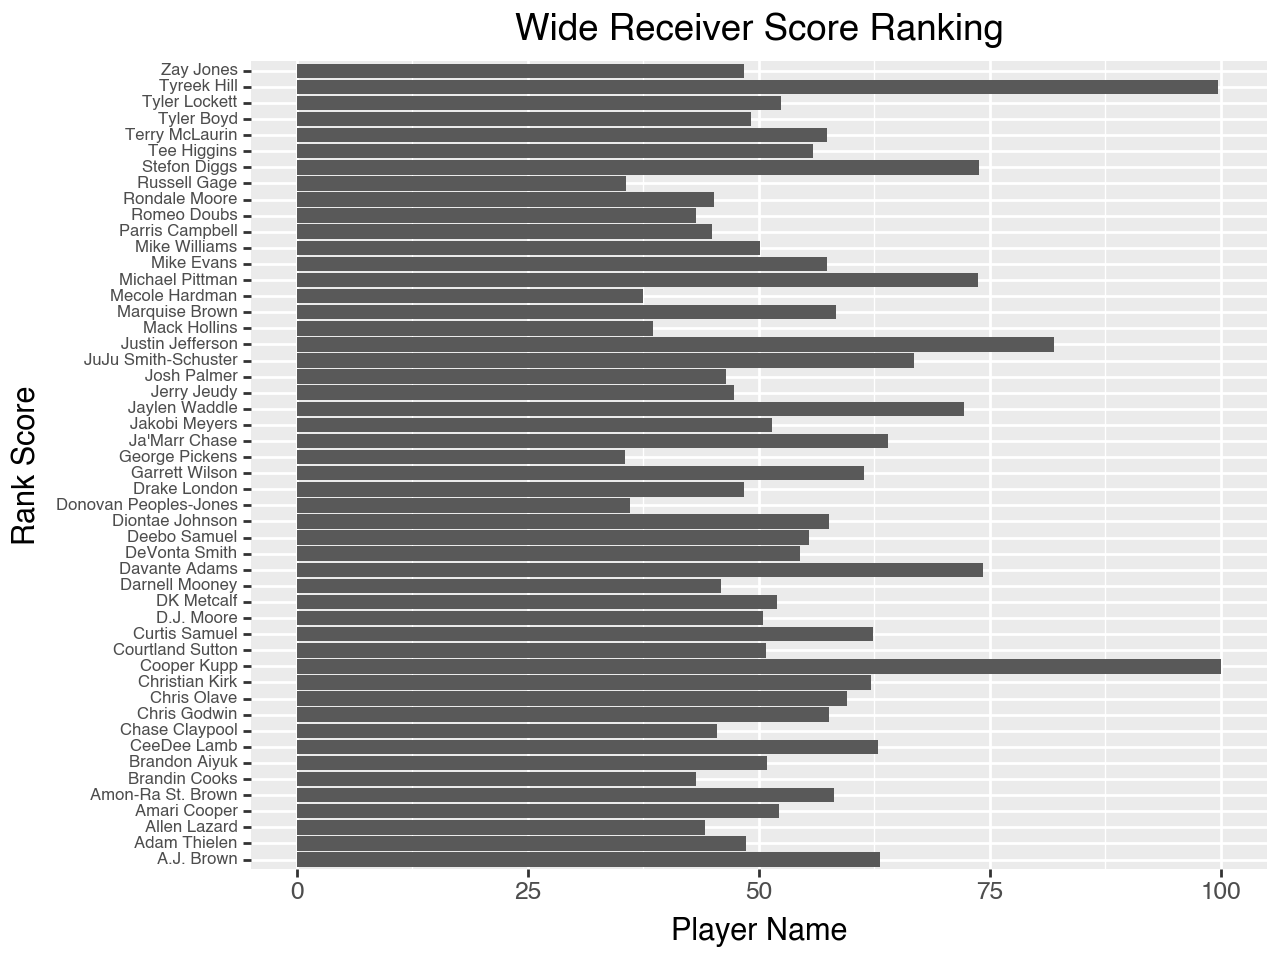

In [222]:
(
    ggplot(df_receiver_grouped.sort_values(by='rank_score', ascending=False).head(50), aes(x='displayName', y='scaled_rank_score')) + 
    geom_col() + 
    coord_flip() + 
    labs(x='Rank Score', y='Player Name', title='Wide Receiver Score Ranking') + 
    theme(axis_text_y=element_text(vjust=0.5, hjust=1, size=6, lineheight=1.5))  # Adjust lineheight for spacing
)